In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.optimize import curve_fit
plt.style.use(['science','no-latex'])

In [3]:
df = pd.read_csv('Untitled1.csv',delimiter=',')
wave_len=df['nm']
Abs_1=df['Abs']
df = pd.read_csv('Untitled2.csv',delimiter=',')
Abs_2=df['Abs']
df = pd.read_csv('Untitled3.csv',delimiter=',')
Abs_3=df['Abs']
df = pd.read_csv('Untitled4.csv',delimiter=',')
Abs_4=df['Abs']
df = pd.read_csv('Untitled5.csv',delimiter=',')
Abs_5=df['Abs']

In [4]:
df

,nm,Abs,Unnamed: 2
0,700.0,0.015,NaN
1,698.0,0.016,NaN
2,696.0,0.017,NaN
3,694.0,0.018,NaN
4,692.0,0.020,NaN
...,...,...,...
146,408.0,0.035,NaN
147,406.0,0.039,NaN
148,404.0,0.044,NaN
149,402.0,0.050,NaN


Text(0, 0.5, 'Absorbance')

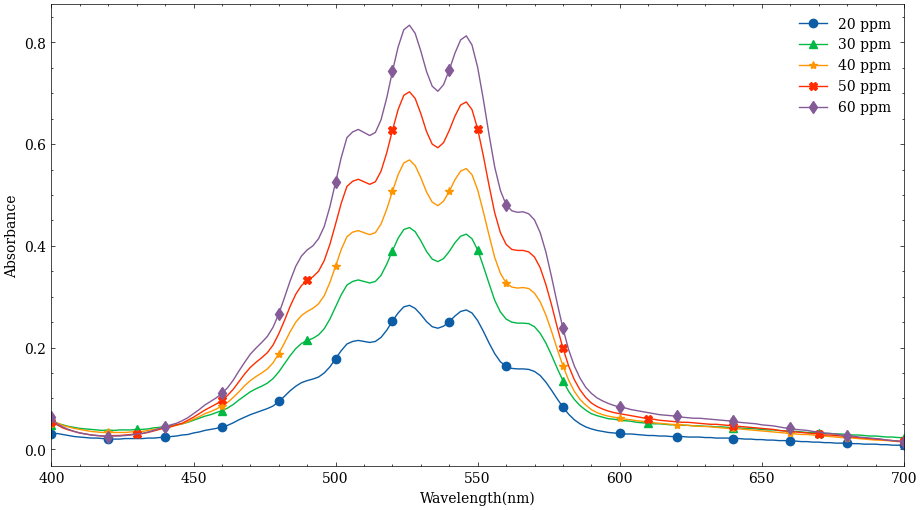

In [3]:
plt.figure(figsize=(11,6))
plt.xlim(400,700)
#plt.ylim(0,0.235)
#plt.yticks(np.arange(0,0.235,0.025))
plt.plot(wave_len,Abs_1,marker='o',markevery=10,label='20 ppm')
#plt.text(wave_len[150], Abs_1[150], '# 1', ha='right', va='center')
plt.plot(wave_len,Abs_2,marker='^',markevery=15,label='30 ppm')
#plt.text(wave_len[150], Abs_2[150], '# 2', ha='right', va='center')
plt.plot(wave_len,Abs_3,marker='*',markevery=10,label='40 ppm')
#plt.text(wave_len[150], Abs_3[150], '# 3', ha='right', va='center')
plt.plot(wave_len,Abs_4,marker='X',markevery=15,label='50 ppm')
#plt.text(wave_len[150], Abs_4[150], '# 4', ha='right', va='center')
plt.plot(wave_len,Abs_5,marker='d',markevery=10,label='60 ppm')
#plt.text(wave_len[150], Abs_5[150], '# 5', ha='right', va='top')
plt.xlabel('Wavelength(nm)')
plt.legend(fancybox=True)
plt.ylabel('Absorbance')

In [4]:
max_Abs=[0.283,0.436,0.569,0.703,0.834]
conc=[20,30,40,50,60]

def ppm_to_Molar(x):
    x=np.array(x)
    molarwt=158.034
    Mol=x/(molarwt*1e3)
    return Mol

ppm_to_Molar(conc)

array([0.00012656, 0.00018983, 0.00025311, 0.00031639, 0.00037967])

In [5]:
def f(x,a,b):
    return a*x+b

popt,pcov = curve_fit(f,ppm_to_Molar(conc),max_Abs)

popt

array([2.16348546e+03, 1.74000001e-02])

Text(0.5, 0, 'Concentration of Solution (mM)')

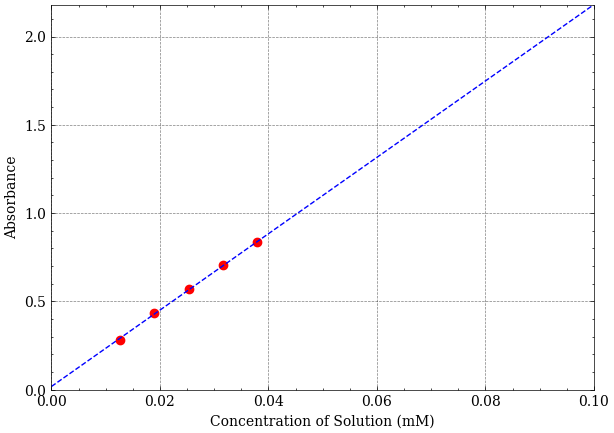

In [14]:
plt.style.use(['science','no-latex','grid'])
plt.figure(figsize=(7,5))
plt.xlim(0,0.1)
plt.ylim(0,f(0.001,*popt))
plt.yticks(np.arange(0,2.5,0.5))
plt.plot(ppm_to_Molar(conc)*100,max_Abs,'ro')
plt.plot(np.linspace(0,0.001,num=50)*100,f(np.linspace(0,0.001,num=50),*popt),'b--')
plt.ylabel('Absorbance')
plt.xlabel('Concentration of Solution (mM)')

In [7]:
popt[0]/0.01

216348.54595071304